In [15]:
using FluidDynTools
using PotentialFlow
using ViscousFlow
using Plots

In [16]:
center = 0.0
r = 1.0
Δs = π/50
z, n̂, Δslist = circle(center,r,Δs)
unit_sources = Source.Point.(z, 1.0);
targets = Elements.position.(unit_sources);

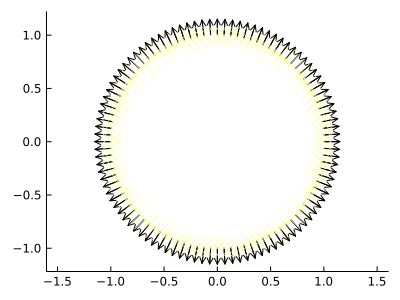

In [17]:
plot(unit_sources, ratio = 1)
quiver!(real.(targets), imag.(targets), quiver = 0.15.*(real.(n̂), imag.(n̂)), color = :black)
plot!(unit_sources, markersize = 10)

In [18]:
zvort = ComplexF64[]
Γvort = Float64[]
push!(zvort,1.5+0.5im)
push!(Γvort,-2*π)
push!(zvort,1.5-0.5im)
push!(Γvort,2*π)
v = Vortex.Point.(zvort,Γvort)

2-element Vector{PotentialFlow.Points.Point{Float64, Float64}}:
 Vortex.Point(1.5 + 0.5im, -6.283185307179586)
 Vortex.Point(1.5 - 0.5im, 6.283185307179586)

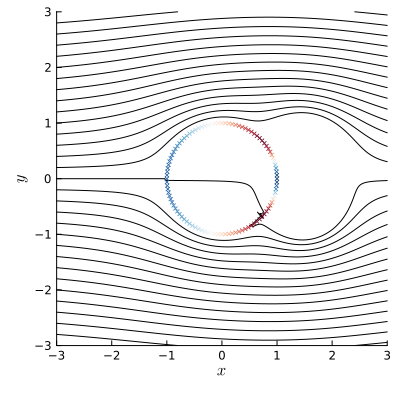

In [19]:
U∞ = 1.0+0im
other_elements = (Freestreams.Freestream(U∞),v)
sources, us, Cp, tx, ty = simulate_flow(unit_sources, Δslist, n̂, other_elements)

plot(tx, ty, color = colorant"black", xlabel = L"x", ylabel = L"y",
               xlim = (-3, 3), ylim = (-3, 3), size = (400, 400))
plot!(sources, markersize = 2, color = :RdBu)

#savefig("hw2_p9_1.png")

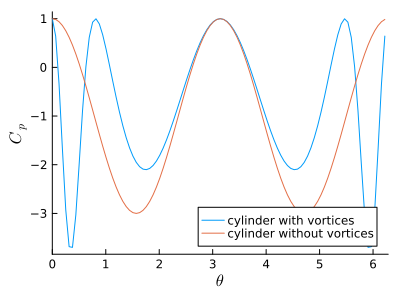

In [20]:
θ = range(0, 2π, length=length(Cp)+1)[1:end-1]
plot(θ,Cp,xlim=(0,2π),xlabel=L"\theta",ylabel=L"C_p",label="cylinder with vortices", legend=true)
Cp2 = 1 .- 4*(sin.(θ)).^2
plot!(θ,Cp2,label="cylinder without vortices")

#savefig("hw2_p9_2.png")

In [21]:
F = -sum(Cp.*n̂.*Δslist)

1.4712605394077176 - 9.571336778702033e-16im